# <span style="color:blue"> 1. Importing Libraries</span>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# <span style="color:blue">2. Loadings Datasets </span>

In [2]:
# Import the MNIST dataset
mnist=tf.keras.datasets.mnist

In [3]:
# Data loading
(x_train, y_train),(x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Dimension of x_train
x_train.shape
# Dimension of x_test
x_test.shape

(10000, 28, 28)

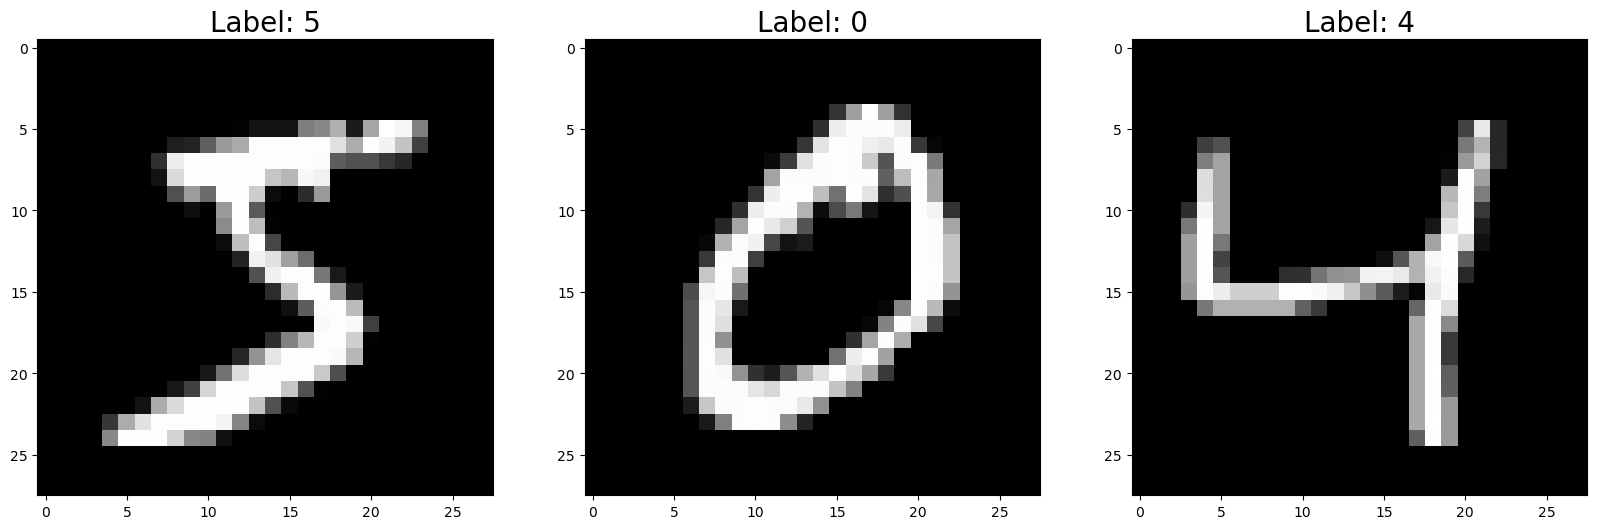

In [5]:
# Examples of some training images
plt.figure(figsize=(20,10))
for index, (image,label) in enumerate(zip(x_train[0:3],y_train[0:3])):
  plt.subplot(1, 3, index + 1)
  plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
  plt.title('Label: {}'.format(label), fontsize = 20)

# <span style="color:blue">3. Pre-processing of data </span>

**HOG Feature Descriptor**

In [6]:
# Element of x_train
img=x_train[1]
# Function to obtain HOG
def get_hog():
    winSize=img.shape
    blockSize=(8,8) # number of parts to obtain from the image
    blockStride=(2,2) # overlap
    cellSize=(4,4) # scrolling window
    nbins=9 # number of bars
    hog=cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins)
    return hog
# Object
hog=get_hog()
# Dimension
hog.compute(img).shape

(4356,)

In [7]:
# Function to get feature dataset from HOG features
def get_features_dataset(data):
    features=[]
    for img in data:
        features.append(hog.compute(img))
    features=np.array(features)    
    return features

In [8]:
# Obtaining HOG features datasets
features_train=get_features_dataset(x_train)
features_test=get_features_dataset(x_test)

In [9]:
# Dimension of features_train
features_train.shape
# Dimension of features_test
features_test.shape

(10000, 4356)

In [10]:
# One-hot labels
y_trainOneHot=tf.one_hot(y_train,np.max(y_train)+1)
y_testOneHot=tf.one_hot(y_test,np.max(y_train)+1)

2023-02-21 22:55:24.061637: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.7/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64::/opt/conda/lib
2023-02-21 22:55:24.061756: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
y_trainOneHot[1]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

# <span style="color:blue">4. Training </span>

In [12]:
# Network
model=Sequential()
model.add(Dense(200,input_dim=features_train.shape[1],activation='relu'))
model.add(Dense(180,activation='relu')) #capas ocultas
model.add(Dense(10,activation='softmax')) #salidas
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),metrics=['accuracy'])
   

In [13]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               871400    
                                                                 
 dense_1 (Dense)             (None, 180)               36180     
                                                                 
 dense_2 (Dense)             (None, 10)                1810      
                                                                 
Total params: 909,390
Trainable params: 909,390
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Model training
model.fit(features_train,y_trainOneHot,epochs=10,batch_size=64)

Epoch 1/10
938/938 [==============================] - 9s 9ms/step - loss: 2.0353 - accuracy: 0.5298
Epoch 2/10
938/938 [==============================] - 9s 10ms/step - loss: 1.2910 - accuracy: 0.8583
Epoch 3/10
938/938 [==============================] - 9s 9ms/step - loss: 0.7055 - accuracy: 0.9232
Epoch 4/10
938/938 [==============================] - 8s 9ms/step - loss: 0.4405 - accuracy: 0.9373
Epoch 5/10
938/938 [==============================] - 8s 9ms/step - loss: 0.3227 - accuracy: 0.9451
Epoch 6/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2608 - accuracy: 0.9506
Epoch 7/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2232 - accuracy: 0.9549
Epoch 8/10
938/938 [==============================] - 8s 9ms/step - loss: 0.1978 - accuracy: 0.9580
Epoch 9/10
938/938 [==============================] - 8s 9ms/step - loss: 0.1795 - accuracy: 0.9602
Epoch 10/10
938/938 [==============================] - 8s 9ms/step - loss: 0.1656 - accuracy: 0.961

In [15]:
# Predictions
prediction_train=model.predict(features_train)

1875/1875 [==============================] - 6s 3ms/step


In [16]:
# Dimension
prediction_train.shape
# Element of prediction_train
prediction_train[0]

array([2.8947566e-04, 4.2494768e-05, 4.9561617e-04, 3.9382187e-01,
       2.8577782e-04, 5.9744573e-01, 4.7929486e-04, 1.7148812e-04,
       6.4144325e-03, 5.5378716e-04], dtype=float32)

In [17]:
# Predictions (0-9)
y_pred_train=np.argmax(prediction_train,1)

In [18]:
y_pred_train

array([5, 0, 4, ..., 5, 6, 8])

# <span style="color:blue">4. Testing </span>

In [19]:
# Predictions
prediction_test=model.predict(features_test)
# Predictions (0-9)
y_pred_test=np.argmax(prediction_test,1)

313/313 [==============================] - 1s 3ms/step


## **Calculation of errors**

In [20]:
errorTrain=np.round(100*np.sum(y_pred_train != y_train)/len(y_train),2)
errorTest=round(100*np.sum(y_pred_test != y_test)/len(y_test),2)
print("Training error is: {}%".format(errorTrain))
print("Testing error is: {}%".format(errorTest))

Training error is: 3.7%
Testing error is: 3.59%


## **Confusion matrix**

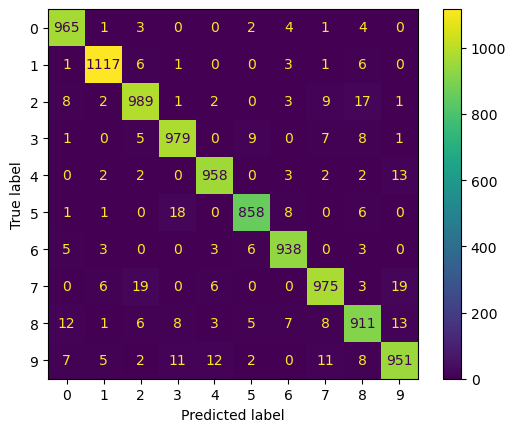

In [21]:
# Consfusion matrix
conf_mat=confusion_matrix(y_test, y_pred_test)
disp=ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()

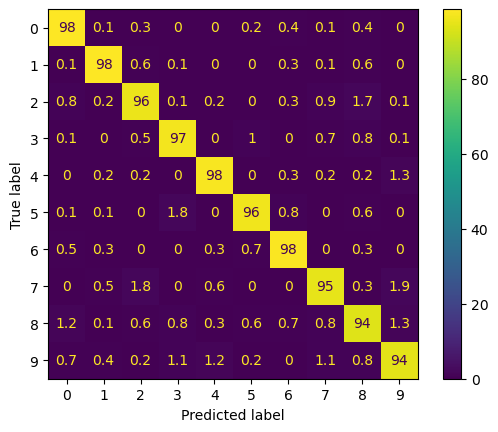

In [22]:
# Normalized consfusion matrix
conf_mat_norm=np.round(100*conf_mat/np.sum(conf_mat,1),1)
disp_norm=ConfusionMatrixDisplay(confusion_matrix=conf_mat_norm)
disp_norm.plot()